[문화 빅데이터] - SNS 제주 관광 키워드별 수집 통계_월

https://www.culture.go.kr/bigdata/user/data_market/detail.do?id=8304b0e0-1d08-11ed-afda-c3455b72364b
    

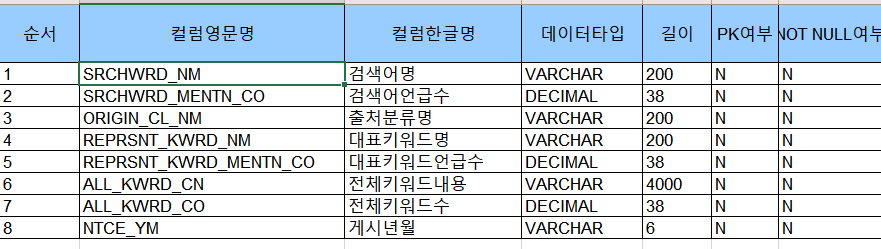

In [2]:
!pip install google-cloud-bigquery google-auth db-dtypes

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("./bigquery_service_account_2.json")

In [5]:
credentials

In [6]:

from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

In [165]:
sql = """
SELECT
  SRCHWRD_NM AS searched_word,
  SUM(SRCHWRD_MENTN_CO) AS cnt
FROM
  `vivid-gantry-404708.project_01.sns_2306`
GROUP BY
  1
ORDER BY
  2 DESC
LIMIT
 20
"""


In [166]:
df = client.query(sql).to_dataframe()


In [124]:
import seaborn as sns 
from matplotlib import pyplot as plt

# plt.rcParams['axes.unicode_minus'] = False

# plt.rcParams['figure.figsize'] = (12, 6)

# plt.rc('xtick', labelsize=SMALL_SIZE)

# plt.xticks(rotation=0)


[Text(0.5, 1.0, 'SNS 검색어 TOP 20 (2023.06)')]

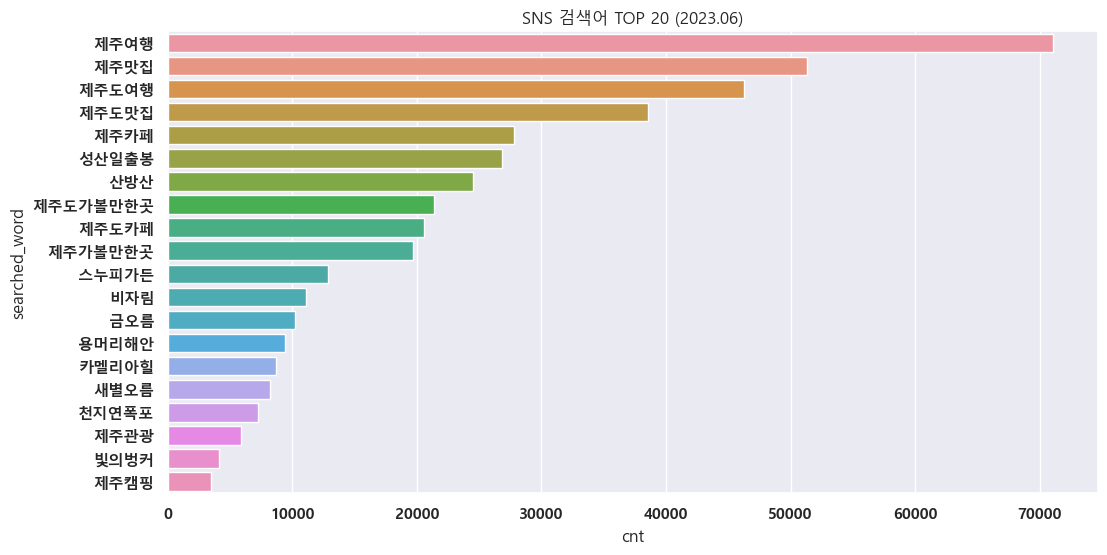

In [167]:
plt.rc("font", family = "Malgun Gothic", size=20, weight="bold")
sns.barplot(
    x="cnt", 
    y="searched_word", 
    data=df,
    width=0.8,

).set(
    title="SNS 검색어 TOP 20 (2023.06)"
)

In [111]:
sql = """
SELECT
  SRCHWRD_NM AS keyword,
  SUM(SRCHWRD_MENTN_CO) AS cnt
FROM
  `vivid-gantry-404708.project_01.sns_2212`
GROUP BY
  1
ORDER BY
  2 DESC
LIMIT
 20
"""


In [112]:
df = client.query(sql).to_dataframe()
df

,keyword,cnt
0,제주여행,13592
1,제주맛집,9013
2,제주도여행,8907
3,제주도맛집,6786
4,성산일출봉,5093
5,제주카페,5073
6,제주도가볼만한곳,3413
7,제주가볼만한곳,3303
8,산방산,3176
9,제주도카페,3051


[Text(0.5, 1.0, 'SNS 제주도 키워드(2022.12)')]

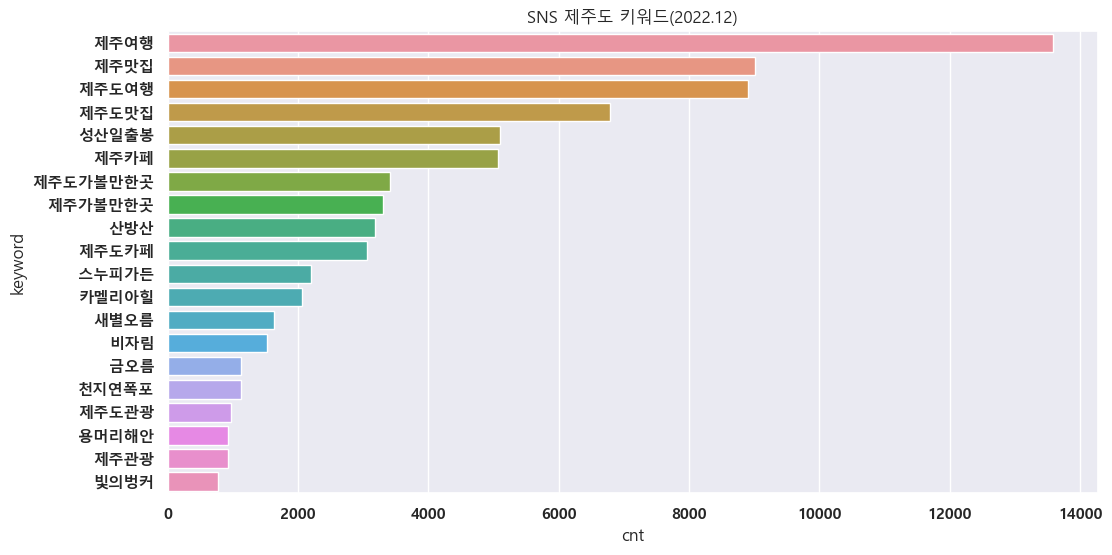

In [114]:
sns.barplot(
    x="cnt", 
    y="keyword", 
    data=df,
    width=0.8,

).set(
    title="SNS 제주도 키워드(2022.12)"
)

In [177]:
sql = '''
SELECT
  REPRSNT_KWRD_NM,
  sum(REPRSNT_KWRD_MENTN_CO)
FROM
  `vivid-gantry-404708.project_01.sns_2306`
WHERE REPRSNT_KWRD_NM LIKE '%맛집'
GROUP BY
  1
HAVING 
'''

In [178]:
df = client.query(sql).to_dataframe()
df

,REPRSNT_KWRD_NM,f0_
0,제주맛집,20060
1,제주도맛집,21932
2,산방산맛집,6967
3,제주구좌맛집,1102
4,제주중문맛집,267
5,성산일출봉맛집,4509
6,천지연폭포맛집,1227


In [189]:
sql = '''
SELECT
  REPRSNT_KWRD_NM AS word,
  SUM(REPRSNT_KWRD_MENTN_CO) AS cnt,
  NTCE_YM AS dt
FROM
  `vivid-gantry-404708.project_01.sns_*`
GROUP BY
  1,3
ORDER BY
  3, 2 DESC

'''

In [190]:
df = client.query(sql).to_dataframe()
df

,word,cnt,dt
0,제주여행,6032,202206
1,제주도,5045,202206
2,제주도여행,3046,202206
3,제주맛집,1986,202206
4,협재해수욕장,1713,202206
...,...,...,...
127,도라지식당,1,202306
128,새별프렌즈,1,202306
129,수풍석박물관,1,202306
130,제주신화월드,1,202306


[Text(0.5, 1.0, '날짜별 SNS 키워드 검색량')]

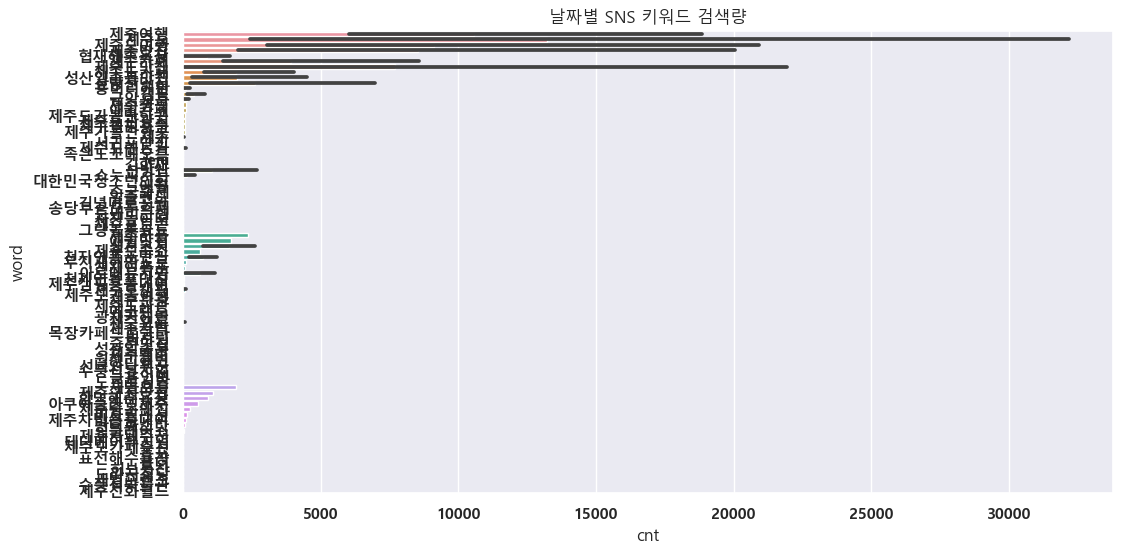

In [193]:
sns.barplot(
    x="cnt", 
    y="word", 

    data=df,
    width=0.8

).set(
    title="날짜별 SNS 키워드 검색량"
) 

In [87]:
# 1년 전,후 제주도 여행 검색 sns 채널 선호도 차이


In [172]:
df = client.query(sql).to_dataframe()


In [ ]:
# 6개월 별로 달라진 것들
# 키워드 달라진 점 확인하기 
# 키워드 중복 없이 출력하기
